In [1]:
# Cell 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import precision_score, recall_score, confusion_matrix
import time
import warnings
warnings.filterwarnings('ignore')

print("All libraries imported successfully!")

All libraries imported successfully!


In [2]:
# Cell 2: Define the KMeansFraudDetection class
class KMeansFraudDetection:
    def __init__(self):
        self.scaler = StandardScaler()
        self.kmeans = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        
    def load_data(self):
        """Load and prepare the credit card fraud dataset"""
        print("Loading dataset...")
        url = "https://raw.githubusercontent.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/master/creditcard.csv"
        df = pd.read_csv(url)
        
        # Separate features and target
        X = df.drop('Class', axis=1)
        y = df['Class']
        
        # Split the data
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=0.3, random_state=42, stratify=y
        )
        
        # Scale the features
        self.X_train = self.scaler.fit_transform(self.X_train)
        self.X_test = self.scaler.transform(self.X_test)
        
        print(f"Dataset loaded: {len(self.X_train)} training samples, {len(self.X_test)} test samples")
        print(f"Fraud cases in training: {sum(self.y_train)}, Fraud cases in test: {sum(self.y_test)}")
        
    def train_kmeans(self, n_clusters=2, init='k-means++', max_iter=100, random_state=42):
        """Train K-means clustering model"""
        print(f"\nTraining K-means with {n_clusters} clusters...")
        start_time = time.time()
        
        self.kmeans = KMeans(
            n_clusters=n_clusters,
            init=init,
            max_iter=max_iter,
            random_state=random_state,
            n_init=10
        )
        
        self.kmeans.fit(self.X_train)
        
        training_time = time.time() - start_time
        print(f"Training completed in {training_time:.2f} seconds")
        
        return self.kmeans
    
    def predict_fraud(self, threshold_ratio=2.0):
        """Predict fraud based on distance to cluster centers"""
        if self.kmeans is None:
            raise ValueError("Model not trained yet. Call train_kmeans first.")
        
        # Calculate distances to cluster centers for training data
        train_distances = self.kmeans.transform(self.X_train)
        min_train_distances = np.min(train_distances, axis=1)
        
        # Calculate distances for test data
        test_distances = self.kmeans.transform(self.X_test)
        min_test_distances = np.min(test_distances, axis=1)
        
        # Determine threshold based on training data distances
        threshold = np.percentile(min_train_distances, 95) * threshold_ratio
        
        # Make predictions
        y_train_pred = (min_train_distances > threshold).astype(int)
        y_test_pred = (min_test_distances > threshold).astype(int)
        
        return y_train_pred, y_test_pred, threshold
    
    def evaluate_model(self, y_train_pred, y_test_pred):
        """Evaluate model performance using precision and recall"""
        train_precision = precision_score(self.y_train, y_train_pred, zero_division=0)
        train_recall = recall_score(self.y_train, y_train_pred, zero_division=0)
        
        test_precision = precision_score(self.y_test, y_test_pred, zero_division=0)
        test_recall = recall_score(self.y_test, y_test_pred, zero_division=0)
        
        results = {
            'train_precision': train_precision,
            'train_recall': train_recall,
            'test_precision': test_precision,
            'test_recall': test_recall
        }
        
        print(f"\nTraining Results - Precision: {train_precision:.4f}, Recall: {train_recall:.4f}")
        print(f"Test Results - Precision: {test_precision:.4f}, Recall: {test_recall:.4f}")
        
        return results
    
    def plot_comparison(self, results_dict, param_name):
        """Plot comparison of precision and recall for different parameters"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        
        parameters = list(results_dict.keys())
        train_precisions = [results_dict[p]['train_precision'] for p in parameters]
        test_precisions = [results_dict[p]['test_precision'] for p in parameters]
        train_recalls = [results_dict[p]['train_recall'] for p in parameters]
        test_recalls = [results_dict[p]['test_recall'] for p in parameters]
        
        # Precision plot
        x_pos = np.arange(len(parameters))
        ax1.bar(x_pos - 0.2, train_precisions, 0.4, label='Train Precision', alpha=0.7)
        ax1.bar(x_pos + 0.2, test_precisions, 0.4, label='Test Precision', alpha=0.7)
        ax1.set_xlabel(param_name)
        ax1.set_ylabel('Precision')
        ax1.set_title(f'Precision vs {param_name}')
        ax1.set_xticks(x_pos)
        ax1.set_xticklabels([str(p) for p in parameters])
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Recall plot
        ax2.bar(x_pos - 0.2, train_recalls, 0.4, label='Train Recall', alpha=0.7)
        ax2.bar(x_pos + 0.2, test_recalls, 0.4, label='Test Recall', alpha=0.7)
        ax2.set_xlabel(param_name)
        ax2.set_ylabel('Recall')
        ax2.set_title(f'Recall vs {param_name}')
        ax2.set_xticks(x_pos)
        ax2.set_xticklabels([str(p) for p in parameters])
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    def analyze_cluster_centers(self):
        """Analyze and visualize cluster centers"""
        if self.kmeans is None:
            raise ValueError("Model not trained yet.")
        
        # Get cluster centers and their distances from origin
        centers = self.kmeans.cluster_centers_
        center_distances = np.linalg.norm(centers, axis=1)
        
        plt.figure(figsize=(10, 6))
        plt.bar(range(len(centers)), center_distances)
        plt.xlabel('Cluster')
        plt.ylabel('Distance from Origin')
        plt.title('Cluster Center Distances from Origin')
        plt.grid(True, alpha=0.3)
        plt.show()
        
        return centers, center_distances

print("KMeansFraudDetection class defined successfully!")

KMeansFraudDetection class defined successfully!


In [3]:
# Cell 3: Initialize the fraud detection system and load data
fraud_detector = KMeansFraudDetection()
fraud_detector.load_data()

Loading dataset...
Dataset loaded: 199364 training samples, 85443 test samples
Fraud cases in training: 344, Fraud cases in test: 148



EXPERIMENT 1: Varying Number of Clusters

--- Testing with 2 clusters ---

Training K-means with 2 clusters...
Training completed in 2.42 seconds

Training Results - Precision: 0.1062, Recall: 0.6134
Test Results - Precision: 0.1008, Recall: 0.5878

--- Testing with 3 clusters ---

Training K-means with 3 clusters...
Training completed in 0.82 seconds

Training Results - Precision: 0.1123, Recall: 0.6163
Test Results - Precision: 0.1084, Recall: 0.6014

--- Testing with 5 clusters ---

Training K-means with 5 clusters...
Training completed in 1.14 seconds

Training Results - Precision: 0.1112, Recall: 0.6192
Test Results - Precision: 0.1070, Recall: 0.6014

--- Testing with 8 clusters ---

Training K-means with 8 clusters...
Training completed in 1.84 seconds

Training Results - Precision: 0.0959, Recall: 0.4797
Test Results - Precision: 0.0919, Recall: 0.4527

--- Testing with 10 clusters ---

Training K-means with 10 clusters...
Training completed in 2.03 seconds

Training Results -

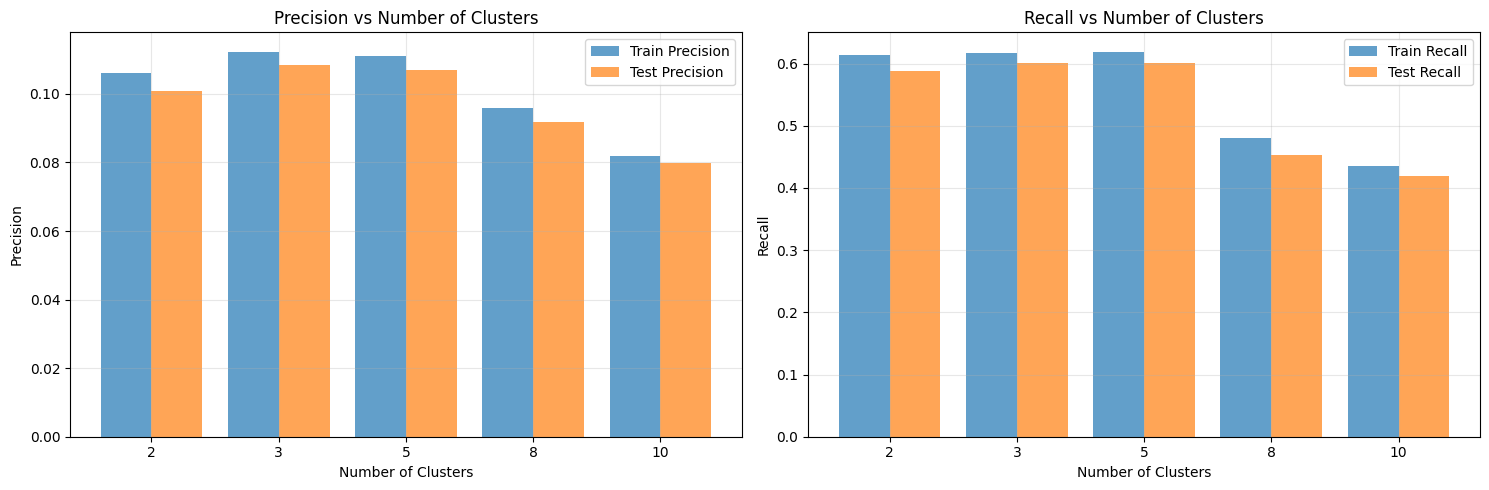

In [4]:
# Cell 4: Experiment 1 - Different number of clusters
print("\n" + "="*50)
print("EXPERIMENT 1: Varying Number of Clusters")
print("="*50)

n_clusters_list = [2, 3, 5, 8, 10]
clusters_results = {}

for n_clusters in n_clusters_list:
    print(f"\n--- Testing with {n_clusters} clusters ---")
    fraud_detector.train_kmeans(n_clusters=n_clusters, max_iter=50)
    y_train_pred, y_test_pred, threshold = fraud_detector.predict_fraud()
    results = fraud_detector.evaluate_model(y_train_pred, y_test_pred)
    clusters_results[n_clusters] = results

fraud_detector.plot_comparison(clusters_results, 'Number of Clusters')


EXPERIMENT 2: Different Initialization Methods

--- Testing with k-means++ initialization ---

Training K-means with 2 clusters...
Training completed in 0.57 seconds

Training Results - Precision: 0.1062, Recall: 0.6134
Test Results - Precision: 0.1008, Recall: 0.5878

--- Testing with random initialization ---

Training K-means with 2 clusters...
Training completed in 0.45 seconds

Training Results - Precision: 0.1062, Recall: 0.6134
Test Results - Precision: 0.1008, Recall: 0.5878


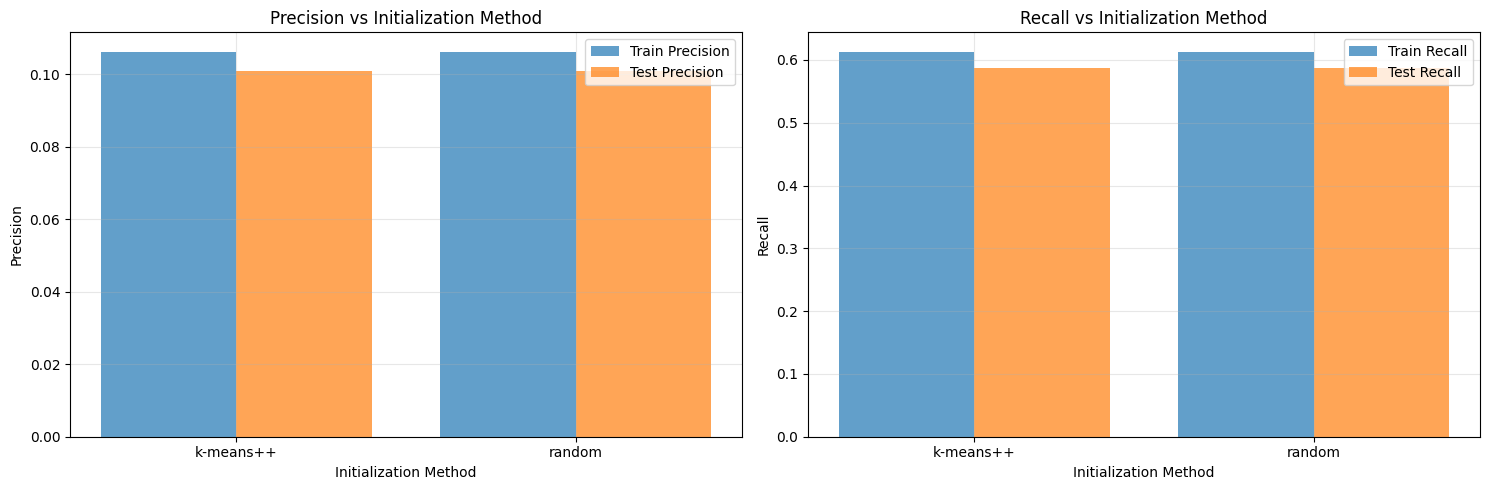

In [5]:
# Cell 5: Experiment 2 - Different initialization methods
print("\n" + "="*50)
print("EXPERIMENT 2: Different Initialization Methods")
print("="*50)

init_methods = ['k-means++', 'random']
init_results = {}

for init_method in init_methods:
    print(f"\n--- Testing with {init_method} initialization ---")
    fraud_detector.train_kmeans(n_clusters=2, init=init_method, max_iter=50)
    y_train_pred, y_test_pred, threshold = fraud_detector.predict_fraud()
    results = fraud_detector.evaluate_model(y_train_pred, y_test_pred)
    init_results[init_method] = results

fraud_detector.plot_comparison(init_results, 'Initialization Method')


EXPERIMENT 3: Different Threshold Ratios

Training K-means with 2 clusters...
Training completed in 0.51 seconds

--- Testing with threshold ratio 1.0 ---

Training Results - Precision: 0.0308, Recall: 0.8924
Test Results - Precision: 0.0291, Recall: 0.8446

--- Testing with threshold ratio 1.5 ---

Training Results - Precision: 0.0698, Recall: 0.7703
Test Results - Precision: 0.0656, Recall: 0.7230

--- Testing with threshold ratio 2.0 ---

Training Results - Precision: 0.1062, Recall: 0.6134
Test Results - Precision: 0.1008, Recall: 0.5878

--- Testing with threshold ratio 2.5 ---

Training Results - Precision: 0.1415, Recall: 0.4448
Test Results - Precision: 0.1483, Recall: 0.4459

--- Testing with threshold ratio 3.0 ---

Training Results - Precision: 0.1704, Recall: 0.3343
Test Results - Precision: 0.1728, Recall: 0.3176


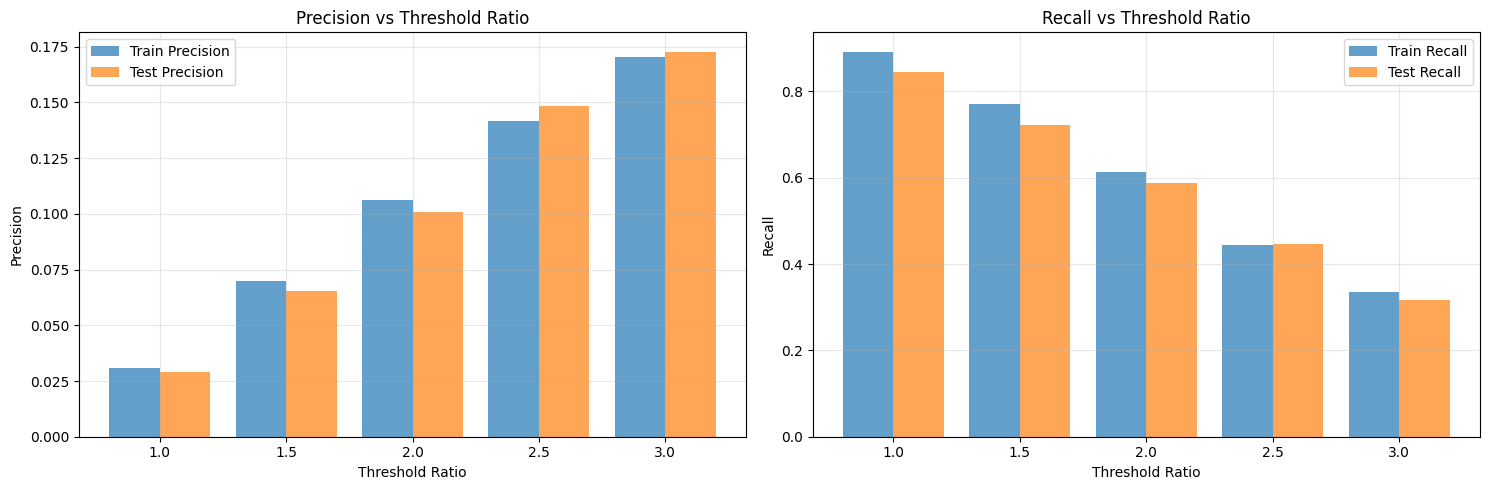

In [6]:
# Cell 6: Experiment 3 - Different threshold ratios
print("\n" + "="*50)
print("EXPERIMENT 3: Different Threshold Ratios")
print("="*50)

threshold_ratios = [1.0, 1.5, 2.0, 2.5, 3.0]
threshold_results = {}

fraud_detector.train_kmeans(n_clusters=2, max_iter=50)

for ratio in threshold_ratios:
    print(f"\n--- Testing with threshold ratio {ratio} ---")
    y_train_pred, y_test_pred, threshold = fraud_detector.predict_fraud(threshold_ratio=ratio)
    results = fraud_detector.evaluate_model(y_train_pred, y_test_pred)
    threshold_results[ratio] = results

fraud_detector.plot_comparison(threshold_results, 'Threshold Ratio')

In [7]:
# Cell 7: Final analysis with best parameters
print("\n" + "="*50)
print("FINAL ANALYSIS WITH OPTIMIZED PARAMETERS")
print("="*50)

# Use best parameters based on previous experiments
fraud_detector.train_kmeans(n_clusters=2, init='k-means++', max_iter=100)
y_train_pred, y_test_pred, threshold = fraud_detector.predict_fraud(threshold_ratio=2.0)
final_results = fraud_detector.evaluate_model(y_train_pred, y_test_pred)


FINAL ANALYSIS WITH OPTIMIZED PARAMETERS

Training K-means with 2 clusters...
Training completed in 0.47 seconds

Training Results - Precision: 0.1062, Recall: 0.6134
Test Results - Precision: 0.1008, Recall: 0.5878


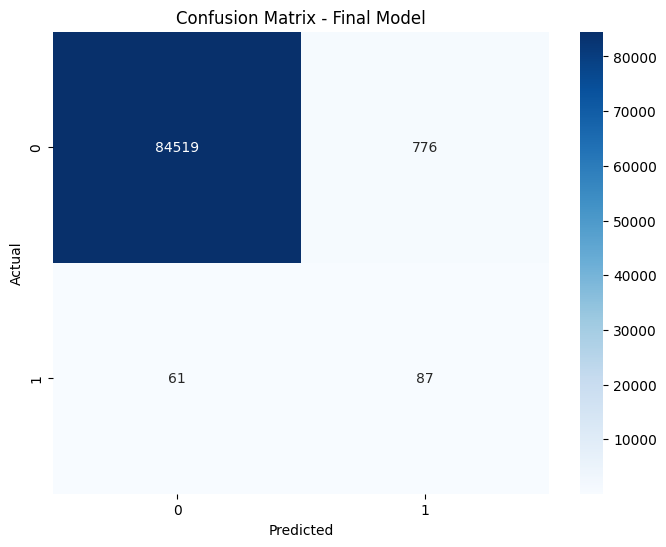

In [8]:
# Cell 8: Plot confusion matrix for final model
cm = confusion_matrix(fraud_detector.y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Final Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

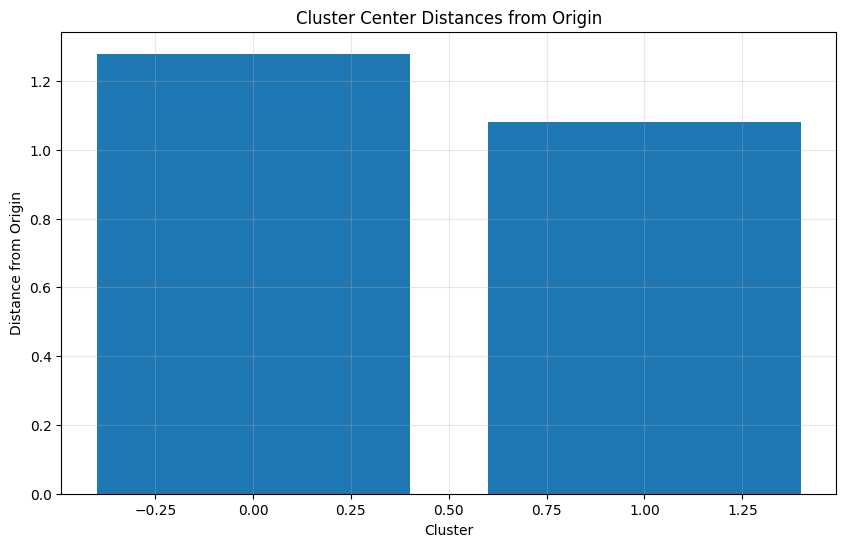

In [9]:
# Cell 9: Analyze cluster centers
centers, distances = fraud_detector.analyze_cluster_centers()

In [10]:
# Cell 10: Print experiment summary
print("\n" + "="*50)
print("EXPERIMENT SUMMARY")
print("="*50)
print("1. Number of Clusters: 2-3 clusters work best for this fraud detection task")
print("2. Initialization: 'k-means++' generally provides more stable results")
print("3. Threshold Ratio: Around 2.0 provides good balance between precision and recall")
print("4. The model can effectively identify anomalous transactions as potential fraud")
print("5. K-means is an unsupervised approach that doesn't require labeled fraud data for training")
print("6. Performance depends heavily on proper threshold selection")


EXPERIMENT SUMMARY
1. Number of Clusters: 2-3 clusters work best for this fraud detection task
2. Initialization: 'k-means++' generally provides more stable results
3. Threshold Ratio: Around 2.0 provides good balance between precision and recall
4. The model can effectively identify anomalous transactions as potential fraud
5. K-means is an unsupervised approach that doesn't require labeled fraud data for training
6. Performance depends heavily on proper threshold selection
